In [43]:
# Set start time

from datetime import datetime
start_time = datetime.now()

In [44]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


In [45]:
# Read Data from Step2 for analysis
df = pd.read_csv('Resources/result_files/step2_reformat_data_for_analysis.csv')
df.head()

,Record Date,Exchange Rate,Effective Date,Country,Currency,Country Name,Country Code,GDPGrowth,Year
0,3/31/01,78400.0,20010331,Afghanistan,Afghani,Afghanistan,AFG,0.000000,2001
1,6/30/01,73000.0,20010630,Afghanistan,Afghani,Afghanistan,AFG,0.000000,2001
2,9/30/01,71500.0,20010930,Afghanistan,Afghani,Afghanistan,AFG,0.000000,2001
3,12/31/01,38200.0,20011231,Afghanistan,Afghani,Afghanistan,AFG,0.000000,2001
4,3/31/01,142.4,20010331,Albania,Lek,Albania,ALB,8.293313,2001


In [46]:
# Filter for one contry if needed
 
# df_filtered = df.loc[df['Country Code'] == 'CHN']
df_filtered = df

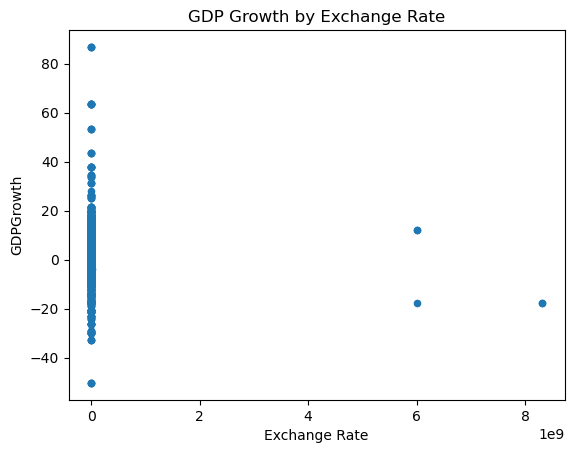

In [47]:
# Create a scatter plot with the GDP Growth data 
country_plot = df_filtered.plot.scatter(
    x="Exchange Rate",
    y="GDPGrowth",
    title="GDP Growth by Exchange Rate",
)

In [48]:
# Update Country Code to the ISO numeric value
country_code_dict = {
"AFG":4,"ALA":248,"ALB":8,"DZA":12,"ASM":16,"AND":20,"AGO":24,"AIA":660,"ATA":10,"ATG":28,"ARG":32,"ARM":51,
"ABW":533,"AUS":36,"AUT":40,"AZE":31,"BHS":44,"BHR":48,"BGD":50,"BRB":52,"BLR":112,"BEL":56,"BLZ":84,"BEN":204,
"BMU":60,"BTN":64,"BOL":68,"BIH":70,"BWA":72,"BVT":74,"BRA":76,"IOT":86,"BRN":96,"BGR":100,"BFA":854,"BDI":108,
"KHM":116,"CMR":120,"CAN":124,"CPV":132,"CYM":136,"CAF":140,"TCD":148,"CHL":152,"CHN":156,"CXR":162,"CCK":166,
"COL":170,"COM":174,"COG":178,"COD":180,"COK":184,"CRI":188,"CIV":384,"HRV":191,"CUB":192,"CYP":196,"CZE":203,
"DNK":208,"DJI":262,"DMA":212,"DOM":214,"ECU":218,"EGY":818,"SLV":222,"GNQ":226,"ERI":232,"EST":233,"ETH":231,
"FLK":238,"FRO":234,"FJI":242,"FIN":246,"FRA":250,"GUF":254,"PYF":258,"ATF":260,"GAB":266,"GMB":270,"GEO":268,
"DEU":276,"GHA":288,"GIB":292,"GRC":300,"GRL":304,"GRD":308,"GLP":312,"GUM":316,"GTM":320,"GGY":831,"GIN":324,
"GNB":624,"GUY":328,"HTI":332,"HMD":334,"VAT":336,"HND":340,"HKG":344,"HUN":348,"ISL":352,"IND":356,"IDN":360,
"IRN":364,"IRQ":368,"IRL":372,"IMN":833,"ISR":376,"ITA":380,"JAM":388,"JPN":392,"JEY":832,"JOR":400,"KAZ":398,
"KEN":404,"KIR":296,"PRK":408,"KOR":410,"KWT":414,"KGZ":417,"LAO":418,"LVA":428,"LBN":422,"LSO":426,"LBR":430,
"LBY":434,"LIE":438,"LTU":440,"LUX":442,"MAC":446,"MKD":807,"MDG":450,"MWI":454,"MYS":458,"MDV":462,"MLI":466,
"MLT":470,"MHL":584,"MTQ":474,"MRT":478,"MUS":480,"MYT":175,"MEX":484,"FSM":583,"MDA":498,"MCO":492,"MNG":496,
"MNE":499,"MSR":500,"MAR":504,"MOZ":508,"MMR":104,"NAM":516,"NRU":520,"NPL":524,"NLD":528,"ANT":530,"NCL":540,
"NZL":554,"NIC":558,"NER":562,"NGA":566,"NIU":570,"NFK":574,"MNP":580,"NOR":578,"OMN":512,"PAK":586,"PLW":585,
"PSE":275,"PAN":591,"PNG":598,"PRY":600,"PER":604,"PHL":608,"PCN":612,"POL":616,"PRT":620,"PRI":630,"QAT":634,
"REU":638,"ROU":642,"RUS":643,"RWA":646,"BLM":652,"SHN":654,"KNA":659,"LCA":662,"MAF":663,"SPM":666,"VCT":670,
"WSM":882,"SMR":674,"STP":678,"SAU":682,"SEN":686,"SRB":688,"SYC":690,"SLE":694,"SGP":702,"SVK":703,"SVN":705,
"SLB":90,"SOM":706,"ZAF":710,"SGS":239,"ESP":724,"LKA":144,"SDN":736,"SUR":740,"SJM":744,"SWZ":748,"SWE":752,
"CHE":756,"SYR":760,"TWN":158,"TJK":762,"TZA":834,"THA":764,"TLS":626,"TGO":768,"TKL":772,"TON":776,"TTO":780,
"TUN":788,"TUR":792,"TKM":795,"TCA":796,"TUV":798,"UGA":800,"UKR":804,"ARE":784,"GBR":826,"USA":840,"UMI":581,
"URY":858,"UZB":860,"VUT":548,"VEN":862,"VNM":704,"VGB":92,"VIR":850,"WLF":876,"ESH":732,"YEM":887,"ZMB":894,
"ZWE":716,"EMU":1,"XKX":2,"SSD":3
}

df_updated = df_filtered.replace({"Country Code": country_code_dict})

df_updated.head(50)


C:\Users\Thomas\AppData\Local\Temp\ipykernel_35052\2302516274.py:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_updated = df_filtered.replace({"Country Code": country_code_dict})


,Record Date,Exchange Rate,Effective Date,Country,Currency,Country Name,Country Code,GDPGrowth,Year
0,3/31/01,78400.000,20010331,Afghanistan,Afghani,Afghanistan,4,0.000000,2001
1,6/30/01,73000.000,20010630,Afghanistan,Afghani,Afghanistan,4,0.000000,2001
2,9/30/01,71500.000,20010930,Afghanistan,Afghani,Afghanistan,4,0.000000,2001
3,12/31/01,38200.000,20011231,Afghanistan,Afghani,Afghanistan,4,0.000000,2001
4,3/31/01,142.400,20010331,Albania,Lek,Albania,8,8.293313,2001
5,6/30/01,149.000,20010630,Albania,Lek,Albania,8,8.293313,2001
6,9/30/01,142.000,20010930,Albania,Lek,Albania,8,8.293313,2001
7,12/31/01,136.300,20011231,Albania,Lek,Albania,8,8.293313,2001
8,3/31/01,76.539,20010331,Algeria,Dinar,Algeria,12,3.000000,2001
9,6/30/01,78.101,20010630,Algeria,Dinar,Algeria,12,3.000000,2001


In [73]:
# Change data type for Country Code to int 
 
df_updated['Country Code'] = df_updated['Country Code'].astype('int')
df_updated.dtypes

Record Date        object
Exchange Rate     float64
Effective Date      int64
Country            object
Currency           object
Country Name       object
Country Code        int32
GDPGrowth         float64
Year                int64
dtype: object

In [50]:
# Separate the data into features and target 

X = df_updated.drop(['Record Date', 'Country', 'Currency', 'Country Name', 'GDPGrowth', 'Year'], axis=1)
y = df_updated['GDPGrowth']

In [51]:
X.head()

,Exchange Rate,Effective Date,Country Code
0,78400.0,20010331,4
1,73000.0,20010630,4
2,71500.0,20010930,4
3,38200.0,20011231,4
4,142.4,20010331,8


In [52]:
X.dtypes

Exchange Rate     float64
Effective Date      int64
Country Code        int32
dtype: object

In [53]:
# Check the features shape 
X.shape

(11762, 3)

### Perform ridge regression

In [54]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [55]:
# Scale the training data
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)

In [56]:
# Create and train the model
model = Ridge(alpha=1)
model.fit(X_train_transformed, y_train)

Ridge(alpha=1)

In [57]:
# Scale the testing data and create predictions
X_test_transformed = scaler.transform(X_test)
y_predicted = model.predict(X_test_transformed)

In [58]:
# Assess the MSE
mean_squared_error(y_test, y_predicted)

26.22886923627828

In [59]:
# Use RidgeCV to optimize for alpha
from sklearn.linear_model import RidgeCV
model_cv = RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 10])
model_cv = model_cv.fit(X_train_transformed, y_train)

In [60]:
# Identify the optimzied alpha value
model_cv.alpha_

10.0

### Compare performance with a linear regression model

In [61]:
# Create and train a linear regression model, create predictions with the model, and evaluate its MSE
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train_transformed, y_train)
y_predicted_lr = lr_model.predict(X_test_transformed)
mean_squared_error(y_test, y_predicted_lr)

26.22888781866321

### Lasso regression

In [62]:
from sklearn.linear_model import Lasso

In [63]:
# Create and train a lasso regression model
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train_transformed, y_train)

Lasso(alpha=1)

In [64]:
# Get the model coeffcients
lasso_model.coef_

array([-0.        , -0.13349565,  0.        ])

In [65]:
# Create predictions with the model
y_predicted_lasso = lasso_model.predict(X_test_transformed)

### Assess the lasso regression MSE and compare to ridge regression

In [66]:
# Evaluate the MSE
mean_squared_error(y_test, y_predicted_lasso)

27.10415991277502

In [67]:
# Create Linear Regression Model

# Create the model
model = LinearRegression()

# Fit the model to the training data. 
model.fit(X_train, y_train)


LinearRegression()

In [68]:
# Evaluate Linear Regresson Model

# Calculate the mean_squared_error and the r-squared value
# for the testing data

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

mean squared error (MSE): 26.228887818663196
R-squared (R2): 0.039898541000386034


In [69]:
# Scale the data for the Random Forest model
scaler_forest = StandardScaler().fit(X_train)
X_train_scaled = scaler_forest.transform(X_train)
X_test_scaled = scaler_forest.transform(X_test)

# with n_estimators=128 and random_state=1
rf_model = RandomForestRegressor(n_estimators=128, random_state=1)

# Fit the model to the training data
rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
print(f'Training Score: {rf_model.score(X_train_scaled, y_train)}')
print(f'Testing Score (R2): {rf_model.score(X_test_scaled, y_test)}')

Training Score: 0.9764628099591433
Testing Score (R2): 0.8799472692666176


In [70]:
# Read CSV Data for analysis
df_predictions = pd.read_csv('Resources/result_files/top_country_predictions.csv')
df_predictions = df_predictions.rename(columns={'Unnamed: 0' : 'Country'})

df_predictions.head()

,Country,Country Code,Ridge MSE,Lasso Regression MSE,Linear Regression R2,Linear Regression MSE,RF Regressor R2
0,China,“CHN”,4.159086,6.123385,0.613715,4.120107,0.824534
1,Japan,“JPN”,8.848326,8.832380,-0.127306,8.847658,0.596121
2,India,“IND”,7.708775,10.533703,0.330875,7.679941,0.737288
3,United Kingdom,“GRB”,15.283395,15.063234,-0.149291,15.328886,0.737288
4,France,“FRA”,4.191556,5.357184,0.216185,4.177402,0.975713


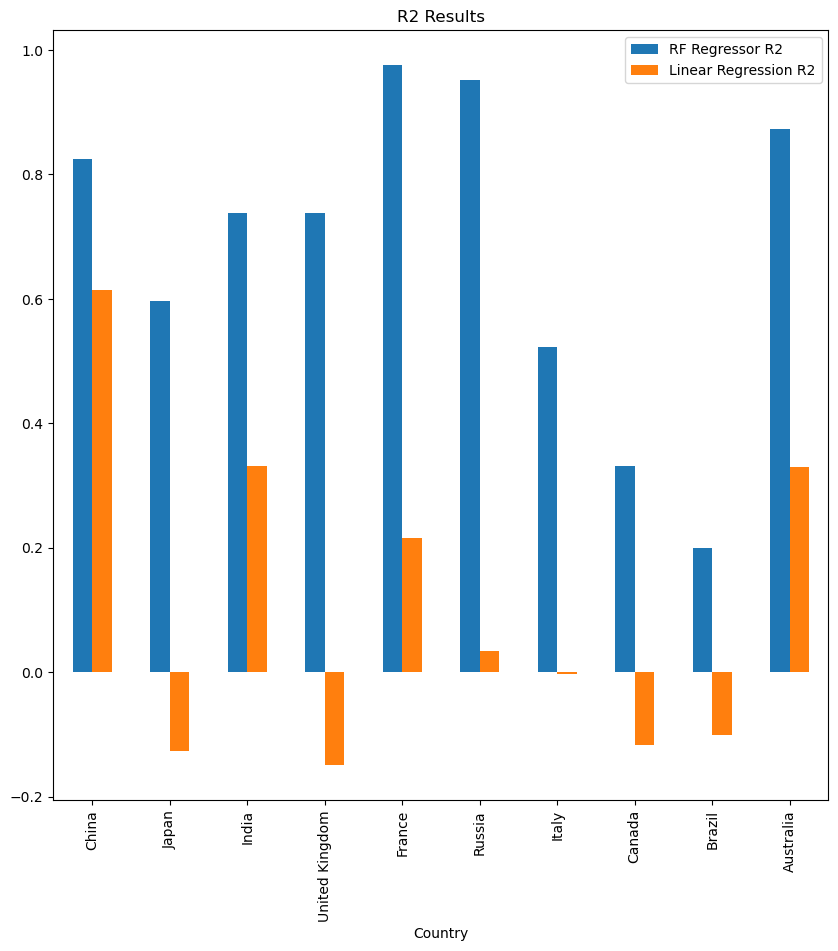

In [71]:


df_predictions.plot(x="Country", y=["RF Regressor R2", "Linear Regression R2" ],
		kind="bar", figsize=(10, 10), title="R2 Results")
# Display plot
plt.show()


In [72]:
# Calculate Duration
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:02.694296
